In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Excercise 1 - modeling height of !Kung people

In [28]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()
# d.describe()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


### Task 1. Prior predictive checks

In [8]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

# R = 1000
# sim=model_ppc.sample(data={'N': 2, 'height': [160, 170]},
#                      iter_sampling=R,
#                      fixed_param=True)

R = 1000
sim=model_ppc.sample(data={'N': len(d.height), 'height': d.height},
                     iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

sim_df = sim.draws_pd()
sim_df

INFO:cmdstanpy:compiling stan file /root/dupa/LAB_04/height_1_ppc.stan to exe file /root/dupa/LAB_04/height_1_ppc
INFO:cmdstanpy:compiled model executable: /root/dupa/LAB_04/height_1_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,mu,sigma,height
0,0.0,0.0,174.853,17.3315,152.803
1,0.0,0.0,154.982,10.8317,157.649
2,0.0,0.0,163.230,21.7960,184.391
3,0.0,0.0,158.276,16.7968,157.906
4,0.0,0.0,164.103,13.9736,159.755
...,...,...,...,...,...
995,0.0,0.0,153.791,16.5634,166.787
996,0.0,0.0,150.873,11.4199,154.000
997,0.0,0.0,149.099,14.6963,150.145
998,0.0,0.0,154.071,15.7439,130.036


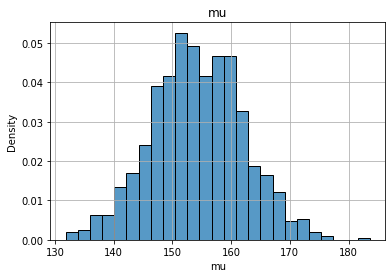

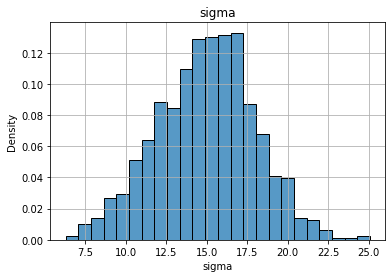

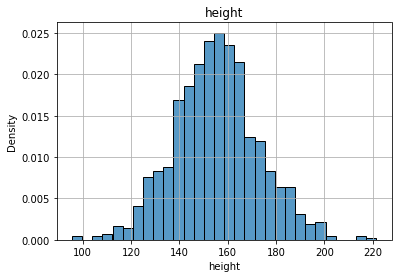

In [16]:
sns.histplot(data=sim_df, x='mu', stat='density')
plt.grid(True)
plt.title('mu')
plt.show()

sns.histplot(data=sim_df, x='sigma', stat='density')
plt.grid(True)
plt.title('sigma')
plt.show()

sns.histplot(data=sim_df, x='height', stat='density')
plt.grid(True)
plt.title('height')
plt.show()


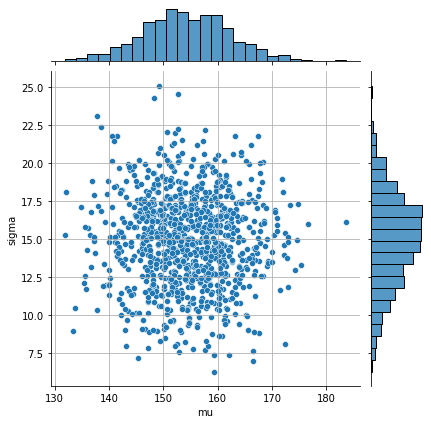

In [18]:
sns.jointplot(data=sim_df, x='mu', y='sigma')
plt.grid(True)
plt.show()

In [ ]:
# The samples appear to be consistent

### Task 2. Model fit and evaluation

In [31]:
model_1_fit = CmdStanModel(stan_file='height_1_fit.stan')
fit = model_1_fit.sample(data=dict(N=len(d), heights=d.height.values), seed=28052020)
fit_df = fit.draws_pd()
fit_df.head()

INFO:cmdstanpy:compiling stan file /root/dupa/LAB_04/height_1_fit.stan to exe file /root/dupa/LAB_04/height_1_fit
INFO:cmdstanpy:compiled model executable: /root/dupa/LAB_04/height_1_fit
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,height_fit
0,-894.124,0.737637,0.660898,2.0,7.0,0.0,895.270,153.811,7.53771,152.352
1,-891.850,1.000000,0.660898,2.0,3.0,0.0,893.888,154.773,7.84898,159.211
2,-893.687,0.925208,0.660898,3.0,7.0,0.0,893.945,154.464,8.42781,155.254
3,-894.386,0.954741,0.660898,3.0,7.0,0.0,894.874,155.034,8.47346,163.065
4,-894.013,1.000000,0.660898,1.0,1.0,0.0,894.455,154.967,8.43272,153.110


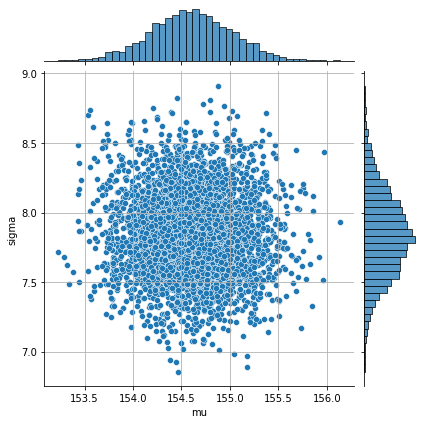

In [33]:
sns.jointplot(data=fit_df, x='mu', y='sigma')
plt.grid(True)
plt.show()

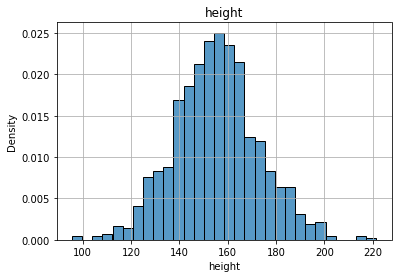

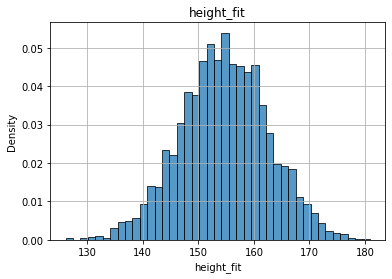

In [36]:
sns.histplot(data=sim_df, x='height', stat='density')
plt.grid(True)
plt.title('height')
plt.show()

sns.histplot(data=fit_df, x='height_fit', stat='density')
plt.grid(True)
plt.title('height_fit')
plt.show()

In [ ]:
# Model differs slightly from the data

### Task 3. Adding predictor to the model - weight

In [37]:
d['c_weight'] = d['weight'] - d['weight'].mean()
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}

### Task 4. Prior predictive checks

In [48]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
ppc_sim = model_ppc.sample(data=data_sim, 
                            iter_sampling=R, 
                            iter_warmup=0, 
                            chains=1, 
                            refresh=R,
                            fixed_param=True,
                            seed=29042020)

ppc_df = ppc_sim.draws_pd()
ppc_df.head()

INFO:cmdstanpy:compiling stan file /root/dupa/LAB_04/height_2a_ppc.stan to exe file /root/dupa/LAB_04/height_2a_ppc
INFO:cmdstanpy:compiled model executable: /root/dupa/LAB_04/height_2a_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,174.853,0.777181,11.1832,165.4620,149.003,167.800,178.960,191.394,...,197.290,205.850,202.516,188.713,170.851,180.796,184.281,196.372,191.528,196.042
1,0.0,0.0,144.768,-0.006780,14.9889,163.0720,156.243,155.941,162.508,163.030,...,184.752,144.316,131.185,142.322,130.389,152.391,129.053,143.160,164.202,143.509
2,0.0,0.0,150.712,-1.138640,11.3344,182.6160,163.686,163.261,171.195,168.059,...,156.712,121.125,152.559,138.475,156.119,133.294,143.718,136.787,130.504,132.634
3,0.0,0.0,146.438,-0.254452,13.4763,167.8900,140.922,146.712,136.634,146.343,...,150.876,145.270,148.297,162.189,136.760,136.061,154.384,135.735,147.490,137.054
4,0.0,0.0,146.351,1.671020,12.8918,89.4398,116.555,115.162,116.381,144.133,...,186.902,184.623,159.391,172.202,169.217,166.266,166.319,184.026,182.761,165.941


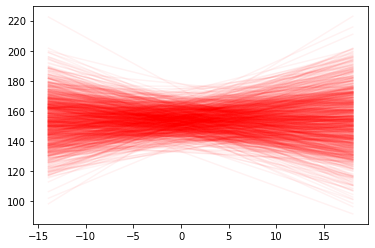

In [49]:
weight = np.linspace(d.c_weight.min(),d.c_weight.max(), R).reshape((R, 1))
h = ppc_df['alpha'].values + (weight * ppc_df['beta'].values)
x = np.ones((1, R)) * weight
plt.plot(x, h, 'r', alpha=0.05)
plt.show()

In [64]:
heights = ppc_df.drop(["lp__", "accept_stat__", "alpha", "beta", "sigma"], axis=1)

print(f'Min predicted high: {heights.min().min()}')
print(f'Max predicted high: {heights.max().max()}')

Min predicted high: 58.7084
Max predicted high: 246.371


In [ ]:
# Min and max values are alright

### Task 5. Modifying prior

In [66]:
model_ppc = CmdStanModel(stan_file='height_2b_ppc.stan')
ppc_sim = model_ppc.sample(data=data_sim, 
                            iter_sampling=R, 
                            iter_warmup=0, 
                            chains=1, 
                            refresh=R,
                            fixed_param=True,
                            seed=29042020)

ppc_df = ppc_sim.draws_pd()
ppc_df.head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,174.853,2.175330,11.1832,146.0000,130.4530,150.1610,162.2310,175.576,...,214.263,223.733,221.309,208.417,191.467,202.322,206.719,219.720,215.787,221.211
1,0.0,0.0,144.768,0.993243,14.9889,149.1520,142.9750,143.3240,150.5430,151.716,...,196.891,157.106,144.627,156.416,145.134,167.787,145.101,159.859,181.553,161.511
2,0.0,0.0,150.712,0.320255,11.3344,162.3100,144.3300,144.8550,153.7390,151.554,...,174.421,139.785,172.170,159.036,177.630,155.755,167.130,161.150,155.817,158.897
3,0.0,0.0,146.438,0.775342,13.4763,153.5560,127.2590,133.7200,124.3120,134.692,...,163.377,158.442,162.140,176.703,151.944,151.916,170.910,152.932,165.357,155.593
4,0.0,0.0,146.351,5.317560,12.8918,38.6819,68.1728,69.1555,72.7499,102.878,...,231.168,231.264,208.407,223.594,222.984,222.409,224.838,244.921,246.031,231.587


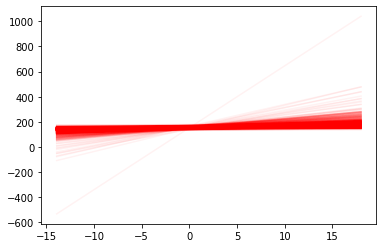

In [67]:
weight = np.linspace(d.c_weight.min(),d.c_weight.max(), R).reshape((R, 1))
h = ppc_df['alpha'].values + (weight * ppc_df['beta'].values)
x = np.ones((1, R)) * weight
plt.plot(x, h, 'r', alpha=0.05)
plt.show()